In [1]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt
import folium
import plotly_express as px
from datetime import datetime
import geemap
# from ipygee import*

In [2]:
jpnShp = gpd.read_file('data/gadm41_JPN_1.shp')

In [3]:
jpnShp

,geometry
0,"MULTIPOLYGON (((137.09743 34.65121, 137.09773 ..."
1,"MULTIPOLYGON (((140.70844 38.92136, 140.69861 ..."
2,"MULTIPOLYGON (((140.95625 40.27003, 140.95795 ..."
3,"MULTIPOLYGON (((139.82417 34.91861, 139.82465 ..."
4,"MULTIPOLYGON (((132.56189 32.91159, 132.56241 ..."
5,"MULTIPOLYGON (((135.77737 35.36200, 135.77370 ..."
6,"MULTIPOLYGON (((130.88498 33.18366, 130.88748 ..."
7,"MULTIPOLYGON (((140.26530 36.93347, 140.26071 ..."
8,"POLYGON ((136.67628 35.17009, 136.67532 35.165..."
9,"POLYGON ((138.94455 36.09058, 138.94102 36.088..."


In [4]:
# jpnCsv = pd.read_csv('data/gadm41_JPN_1.csv')
# jpnCsv

In [5]:
# ax = jpnShp.plot(figsize=(14, 14))
# jpnShp.apply(lambda x: ax.annotate(text=jpnCsv.NAME_1,xy=x.geometry.centroid.coords[0], ha='center', color = 'black', size = 9),axis=1)
# jpnShp.plot(ax = ax, edgecolors='black')
# plt.title('Administrative level 1 map in Japan', fontsize=16)
# plt.show();

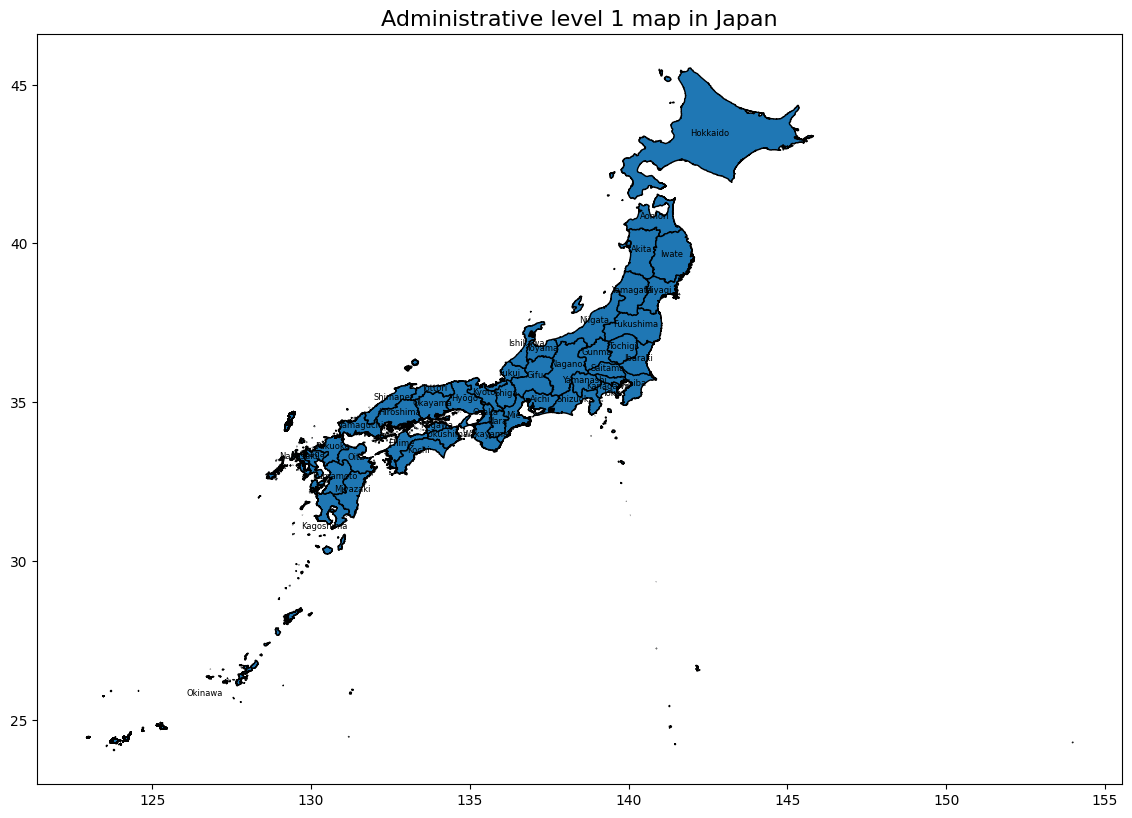

In [4]:
import matplotlib.pyplot as plt


jpnCsv = pd.read_csv('data/gadm41_JPN_1.csv')
merged_df = jpnShp.merge(jpnCsv[['NAME_1']], left_index=True, right_index=True)

# Plot the map
ax = merged_df.plot(figsize=(14, 14))

# Annotate each region
for idx, row in merged_df.iterrows():
    # Get the corresponding name
    name = row['NAME_1']
    # Get the centroid of the geometry
    centroid = row.geometry.centroid
    # Annotate the map
    ax.annotate(text=name, xy=(centroid.x, centroid.y), ha='center', color='black', size=6)

# Plot the shapefile with edge colors
merged_df.plot(ax=ax, edgecolor='black')

# Set the title
plt.title('Administrative level 1 map in Japan', fontsize=16)

# Show the plot
plt.show()

In [5]:
merged_df = jpnShp.merge(jpnCsv[['NAME_1']], left_index=True, right_index=True)
merged_df

,geometry,NAME_1
0,"MULTIPOLYGON (((137.09743 34.65121, 137.09773 ...",Aichi
1,"MULTIPOLYGON (((140.70844 38.92136, 140.69861 ...",Akita
2,"MULTIPOLYGON (((140.95625 40.27003, 140.95795 ...",Aomori
3,"MULTIPOLYGON (((139.82417 34.91861, 139.82465 ...",Chiba
4,"MULTIPOLYGON (((132.56189 32.91159, 132.56241 ...",Ehime
5,"MULTIPOLYGON (((135.77737 35.36200, 135.77370 ...",Fukui
6,"MULTIPOLYGON (((130.88498 33.18366, 130.88748 ...",Fukuoka
7,"MULTIPOLYGON (((140.26530 36.93347, 140.26071 ...",Fukushima
8,"POLYGON ((136.67628 35.17009, 136.67532 35.165...",Gifu
9,"POLYGON ((138.94455 36.09058, 138.94102 36.088...",Gunma


In [9]:
lung_cancer_df = pd.read_csv('data/lung_cancer.csv')
lung_cancer_df

,YEAR,AREA,NUMBER
0,2018,Hokkaido,824
1,2018,Aomori-ken,248
2,2018,Iwate-ken,235
3,2018,Miyagi-ken,482
4,2018,Akita-ken,192
5,2018,Yamagata-ken,251
6,2018,Fukushima-ken,364
7,2018,Ibaraki-ken,495
8,2018,Tochigi-ken,373
9,2018,Gumma-ken,370


In [10]:
# # Correcting the mismatched area names in lung_cancer_df
# lung_cancer_df['AREA'] = lung_cancer_df['AREA'].replace({
#     'Gumma': 'Gunma',
#     'Hyogo': 'Hyōgo',
#     'Nagasaki': 'Naoasaki'
# })

# # Verifying the correction
# mismatched_areas = set(lung_cancer_df['AREA']) - set(merged_df['NAME_1'])
# print("Mismatched Areas:", mismatched_areas)  # Should be an empty set

In [11]:
# Merging the dataframes on the corrected area names
merged_data = pd.merge(merged_df, lung_cancer_df, left_on='NAME_1', right_on='AREA')
merged_data

,geometry,NAME_1,YEAR,AREA,NUMBER
0,"MULTIPOLYGON (((140.08817 41.41789, 140.08797 ...",Hokkaido,2018,Hokkaido,824


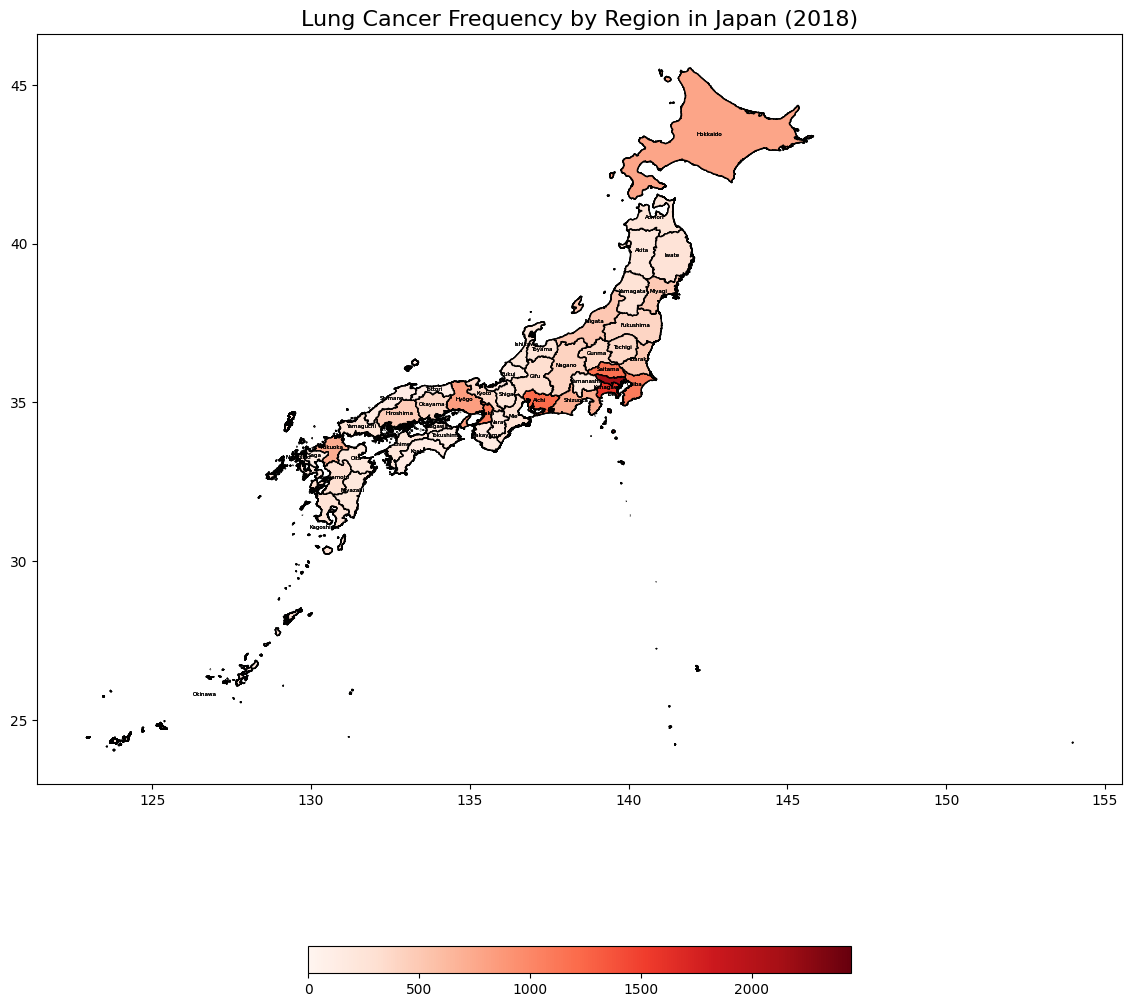

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to clean area names
def clean_area_name(area_name):
    suffixes = ['-ken', '-fu', '-to', '-do']
    for suffix in suffixes:
        area_name = area_name.replace(suffix, '')
    return area_name.strip()

# Correct specific mismatched area names
lung_cancer_df['AREA'] = lung_cancer_df['AREA'].replace({
    'Gumma': 'Gunma',
    'Hyogo': 'Hyōgo',
    'Nagasaki': 'Naoasaki'
})

# Clean the AREA column
lung_cancer_df['AREA'] = lung_cancer_df['AREA'].apply(clean_area_name)

# Remove commas from the NUMBER column and convert to integer
# lung_cancer_df['NUMBER'] = lung_cancer_df['NUMBER'].str.replace(',', '').astype(int)

# Merge the dataframes on the standardized region names
merged = merged_df.merge(lung_cancer_df, left_on='NAME_1', right_on='AREA')

# Plot the map with a gradient from light to dark color
fig, ax = plt.subplots(1, 1, figsize=(14, 14))
merged.plot(column='NUMBER', ax=ax, legend=True, cmap='Reds', edgecolor='black', 
            legend_kwds={'shrink': 0.5, 'orientation': "horizontal"})

# Annotate each region
for idx, row in merged.iterrows():
    name = row['NAME_1']
    centroid = row['geometry'].centroid
    ax.annotate(text=name, xy=(centroid.x, centroid.y), ha='center', color='black', size=4)

# Set the title
plt.title('Lung Cancer Frequency by Region in Japan (2018)', fontsize=16)

# Show the plot
plt.show()

### Hospital

In [84]:
clinic = pd.read_csv('data/clinic.csv')
clinic = clinic[clinic["YEAR"] == 2020]
clinic = clinic[clinic["AREA"] != "All Japan"]
clinic

,YEAR,AREA,/ITEMS,I530242_Number of general clinics by department (Respiratory surgery)[number of clinics],Annotation
1,2020,Hokkaido,NaN,1,NaN
2,2020,Aomori-ken,NaN,2,NaN
3,2020,Iwate-ken,NaN,0,NaN
4,2020,Miyagi-ken,NaN,2,NaN
5,2020,Akita-ken,NaN,0,NaN
6,2020,Yamagata-ken,NaN,2,NaN
7,2020,Fukushima-ken,NaN,2,NaN
8,2020,Ibaraki-ken,NaN,7,NaN
9,2020,Tochigi-ken,NaN,1,NaN
10,2020,Gumma-ken,NaN,0,NaN


In [85]:
hospital = pd.read_csv('data/hospital.csv')
hospital = hospital[hospital["YEAR"] == 2007]
hospital = hospital[hospital["AREA"] != "All Japan"]
hospital

,YEAR,AREA,/ITEMS,I530102_Number of general hospitals by department (Respiratory)[number of hospitals],Annotation
1,2007,Hokkaido,NaN,143,NaN
2,2007,Aomori-ken,NaN,23,NaN
3,2007,Iwate-ken,NaN,25,NaN
4,2007,Miyagi-ken,NaN,39,NaN
5,2007,Akita-ken,NaN,25,NaN
6,2007,Yamagata-ken,NaN,13,NaN
7,2007,Fukushima-ken,NaN,56,NaN
8,2007,Ibaraki-ken,NaN,67,NaN
9,2007,Tochigi-ken,NaN,38,NaN
10,2007,Gumma-ken,NaN,37,NaN


In [86]:
df_clinic = pd.DataFrame(clinic)
df_hospital = pd.DataFrame(hospital)

# Ensure the columns are of integer type
df_clinic['I530242_Number of general clinics by department (Respiratory surgery)[number of clinics]'] = df_clinic['I530242_Number of general clinics by department (Respiratory surgery)[number of clinics]'].astype(int)
df_hospital['I530102_Number of general hospitals by department (Respiratory)[number of hospitals]'] = df_hospital['I530102_Number of general hospitals by department (Respiratory)[number of hospitals]'].astype(int)

# Sum the number of clinics and hospitals for each area
df_sum = pd.DataFrame()
df_sum['AREA'] = df_clinic['AREA']
df_sum['NUMBER'] = df_clinic['I530242_Number of general clinics by department (Respiratory surgery)[number of clinics]'] + df_hospital['I530102_Number of general hospitals by department (Respiratory)[number of hospitals]']
df_sum

,AREA,NUMBER
1,Hokkaido,144
2,Aomori-ken,25
3,Iwate-ken,25
4,Miyagi-ken,41
5,Akita-ken,25
6,Yamagata-ken,15
7,Fukushima-ken,58
8,Ibaraki-ken,74
9,Tochigi-ken,39
10,Gumma-ken,37


In [35]:
lung_cancer_df = df_sum

In [36]:
# Merging the dataframes on the corrected area names
merged_data = pd.merge(merged_df, lung_cancer_df, left_on='NAME_1', right_on='AREA')
merged_data

,geometry,NAME_1,AREA,NUMBER
0,"MULTIPOLYGON (((140.08817 41.41789, 140.08797 ...",Hokkaido,Hokkaido,144


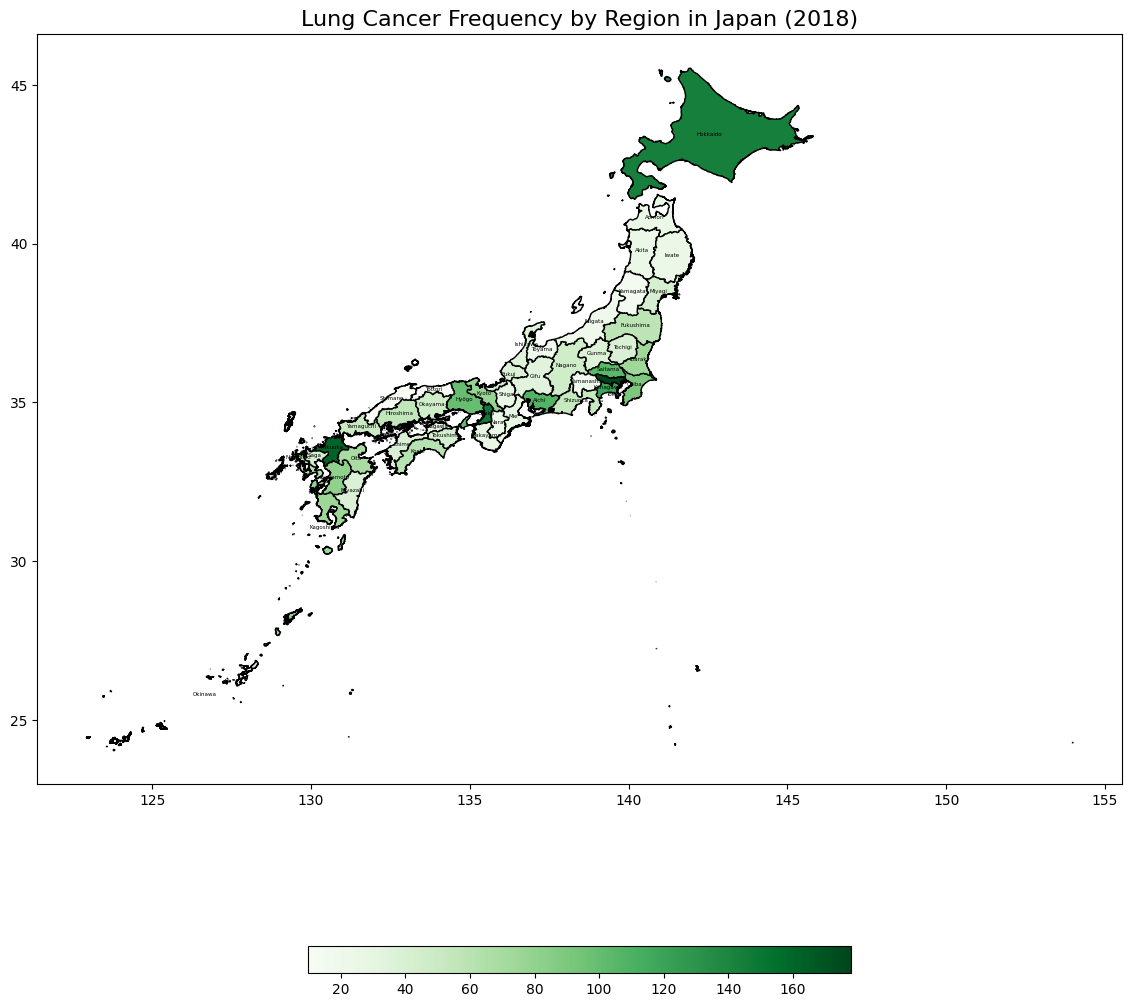

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample dataframes for illustration (replace with actual data)
# lung_cancer_df and merged_df should be defined beforehand

# Function to clean area names
def clean_area_name(area_name):
    suffixes = ['-ken', '-fu', '-to', '-do']
    for suffix in suffixes:
        area_name = area_name.replace(suffix, '')
    return area_name.strip()

# Correct specific mismatched area names
lung_cancer_df['AREA'] = lung_cancer_df['AREA'].replace({
    'Gumma': 'Gunma',
    'Hyogo': 'Hyōgo',
    'Nagasaki': 'Naoasaki'
})

# Clean the AREA column
lung_cancer_df['AREA'] = lung_cancer_df['AREA'].apply(clean_area_name)

# Remove commas from the NUMBER column and handle non-numeric values
lung_cancer_df['NUMBER'] = lung_cancer_df['NUMBER'].replace('-', '0')  # Replace '-' with '0'
# lung_cancer_df['NUMBER'] = lung_cancer_df['NUMBER'].str.replace(',', '').astype(int)

# Merge the dataframes on the standardized region names
merged = merged_df.merge(lung_cancer_df, left_on='NAME_1', right_on='AREA')

# Plot the map with a gradient from light to dark color
fig, ax = plt.subplots(1, 1, figsize=(14, 14))
merged.plot(column='NUMBER', ax=ax, legend=True, cmap='Greens', edgecolor='black', 
            legend_kwds={'shrink': 0.5, 'orientation': "horizontal"})

# Annotate each region
for idx, row in merged.iterrows():
    name = row['NAME_1']
    centroid = row['geometry'].centroid
    ax.annotate(text=name, xy=(centroid.x, centroid.y), ha='center', color='black', size=4)

# Set the title
plt.title('Lung Cancer Frequency by Region in Japan (2018)', fontsize=16)

# Show the plot
plt.show()

## Ratio of Lung Cancer to japan population

In [29]:
population = pd.read_csv('data/japanese_population.csv')
lung_cancer = pd.read_csv('data/lung_cancer.csv')

In [30]:
# Filter the population data for the year 2023 and exclude the "Japan" region
population = population[(population["Time"] == '2023') & (population["Region"] != "Japan")]

# Ensure the columns are of integer type
population['Total population (Both sexes)【person】'] = population['Total population (Both sexes)【person】'].astype(int)
population = population.rename(columns={'Region': 'AREA'})

# Process lung cancer data
lung_cancer['NUMBER'] = lung_cancer['NUMBER'].str.replace(',', '').astype(int)

# Merge the datasets on AREA
merged_data = pd.merge(population, lung_cancer, on='AREA', how='inner')

# Calculate the ratio
merged_data['Lung Cancer Ratio'] = merged_data['NUMBER'] / merged_data['Total population (Both sexes)【person】']

# Select only the relevant columns for the final dataframe
df_population_ratio = merged_data[['AREA', 'Lung Cancer Ratio']]

In [31]:
df_population_ratio

,AREA,Lung Cancer Ratio
0,Hokkaido,0.000162
1,Aomori-ken,0.000209
2,Iwate-ken,0.000202
3,Miyagi-ken,0.000213
4,Akita-ken,0.000210
5,Yamagata-ken,0.000245
6,Fukushima-ken,0.000206
7,Ibaraki-ken,0.000175
8,Tochigi-ken,0.000197
9,Gumma-ken,0.000195


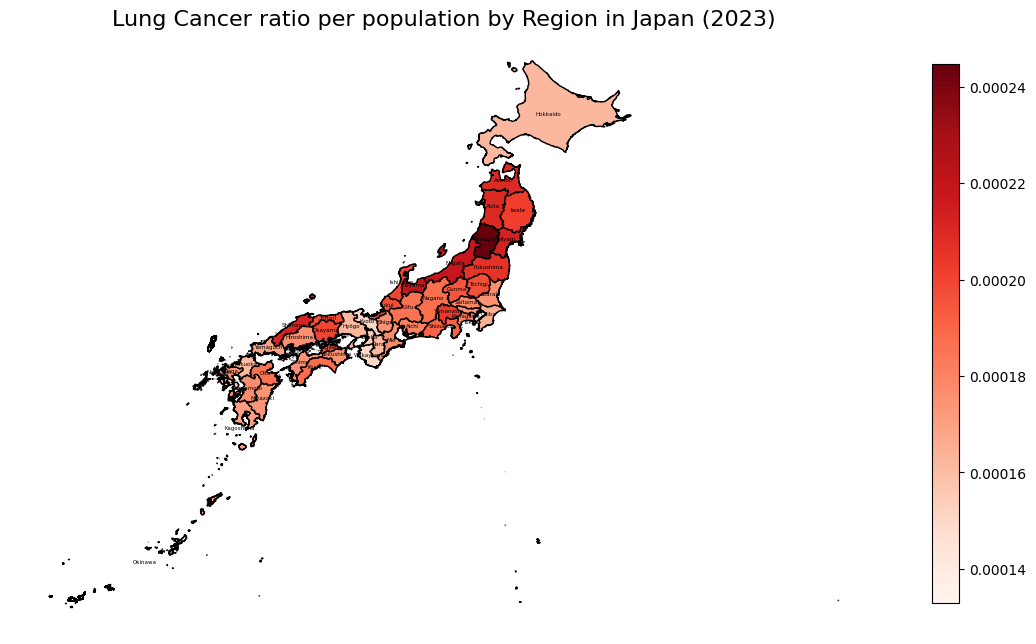

In [41]:
def clean_area_name(area_name):
    """Remove specific suffixes from area names and strip whitespace."""
    suffixes = ['-ken', '-fu', '-to', '-do']
    for suffix in suffixes:
        area_name = area_name.replace(suffix, '')
    return area_name.strip()

# Create a dictionary for the specific mismatched area names corrections
area_corrections = {
    'Gumma': 'Gunma',
    'Hyogo': 'Hyōgo',
    'Nagasaki': 'Naoasaki'
}

# Apply the corrections and clean area names using .loc to avoid SettingWithCopyWarning
df_population_ratio.loc[:, 'AREA'] = df_population_ratio['AREA'].replace(area_corrections).apply(clean_area_name)

# Merge the dataframes on the standardized region names
merged = merged_df.merge(df_population_ratio, left_on='NAME_1', right_on='AREA')

# Plot the map with a gradient from light to dark color
fig, ax = plt.subplots(1, 1, figsize=(14, 14))
merged.plot(column='Lung Cancer Ratio', ax=ax, legend=True, cmap='Reds', edgecolor='black',
            legend_kwds={'shrink': 0.5})

# Annotate each region
for idx, row in merged.iterrows():
    name = row['NAME_1']
    centroid = row['geometry'].centroid
    ax.annotate(text=name, xy=(centroid.x, centroid.y), ha='center', color='black', size=4)

# Set the title
plt.title('Lung Cancer ratio per population by Region in Japan (2023)', fontsize=16)
plt.axis('off')

# Show the plot
plt.show()

## Ratio of land to hospital

In [14]:
city_area = pd.read_csv('data/city_area.csv')
hospital_clinic_number = pd.read_csv('data/hospital_clinic_number.csv')

In [15]:
# Unit is ha
city_area

,Time,Region Code,Region,Total land area (Incl. the northern territories and Takeshima)【ha】,Annotation
0,1975,0,Japan,37753499,NaN
1,1975,1000,Hokkaido,8351287,NaN
2,1975,2000,Aomori-ken,961429,NaN
3,1975,3000,Iwate-ken,1527739,NaN
4,1975,4000,Miyagi-ken,729094,NaN
...,...,...,...,...,...
2299,2022,43000,Kumamoto-ken,740918,NaN
2300,2022,44000,Oita-ken,634070,NaN
2301,2022,45000,Miyazaki-ken,773424,NaN
2302,2022,46000,Kagoshima-ken,918633,NaN


In [17]:
# convert ha to km2
city_area['area_number'] = city_area['Total land area (Incl. the northern territories and Takeshima)【ha】'] / 100

# Filter the data for the year 2022 and exclude the "Japan" region
city_area = city_area[(city_area["Time"] == 2022) & (city_area["Region"] != "Japan")]

city_area

,Time,Region Code,Region,Total land area (Incl. the northern territories and Takeshima)【ha】,Annotation,area_number
2257,2022,1000,Hokkaido,8342381,NaN,83423.81
2258,2022,2000,Aomori-ken,964595,NaN,9645.95
2259,2022,3000,Iwate-ken,1527501,NaN,15275.01
2260,2022,4000,Miyagi-ken,728229,NaN,7282.29
2261,2022,5000,Akita-ken,1163752,NaN,11637.52
2262,2022,6000,Yamagata-ken,932315,NaN,9323.15
2263,2022,7000,Fukushima-ken,1378414,NaN,13784.14
2264,2022,8000,Ibaraki-ken,609754,NaN,6097.54
2265,2022,9000,Tochigi-ken,640809,NaN,6408.09
2266,2022,10000,Gumma-ken,636228,NaN,6362.28


In [19]:
def clean_area_name(area_name):
    """Remove specific suffixes from area names and strip whitespace."""
    suffixes = ['-ken', '-fu', '-to', '-do']
    for suffix in suffixes:
        area_name = area_name.replace(suffix, '')
    return area_name.strip()

# Create a dictionary for the specific mismatched area names corrections
area_corrections = {
    'Gumma': 'Gunma',
    'Hyogo': 'Hyōgo',
    'Nagasaki': 'Naoasaki'
}

city_area.rename(columns={'Region': 'AREA'})
# Apply the corrections and clean area names using .loc to avoid SettingWithCopyWarning
city_area.loc[:, 'AREA'] = city_area['AREA'].replace(area_corrections).apply(clean_area_name)
city_area

,Time,Region Code,AREA,Total land area (Incl. the northern territories and Takeshima)【ha】,Annotation,area_number
2257,2022,1000,Hokkaido,8342381,NaN,83423.81
2258,2022,2000,Aomori,964595,NaN,9645.95
2259,2022,3000,Iwate,1527501,NaN,15275.01
2260,2022,4000,Miyagi,728229,NaN,7282.29
2261,2022,5000,Akita,1163752,NaN,11637.52
2262,2022,6000,Yamagata,932315,NaN,9323.15
2263,2022,7000,Fukushima,1378414,NaN,13784.14
2264,2022,8000,Ibaraki,609754,NaN,6097.54
2265,2022,9000,Tochigi,640809,NaN,6408.09
2266,2022,10000,Gunma,636228,NaN,6362.28


In [20]:
hospital_clinic_number

,Unnamed: 0,AREA,NUMBER
0,1,Hokkaido,144
1,2,Aomori,25
2,3,Iwate,25
3,4,Miyagi,41
4,5,Akita,25
5,6,Yamagata,15
6,7,Fukushima,58
7,8,Ibaraki,74
8,9,Tochigi,39
9,10,Gunma,37


In [22]:
# Merge the datasets on AREA
merged_data = pd.merge(city_area, hospital_clinic_number, on='AREA', how='inner')

# Calculate the ratio
merged_data['area_ratio'] = merged_data['NUMBER'] / merged_data['area_number']

# Select only the relevant columns for the final dataframe
df_hospital_area_ratio = merged_data[['AREA', 'area_ratio']]

In [23]:
df_hospital_area_ratio

,AREA,area_ratio
0,Hokkaido,0.001726
1,Aomori,0.002592
2,Iwate,0.001637
3,Miyagi,0.005630
4,Akita,0.002148
5,Yamagata,0.001609
6,Fukushima,0.004208
7,Ibaraki,0.012136
8,Tochigi,0.006086
9,Gunma,0.005816


In [1]:
# Merge the dataframes on the standardized region names
merged = merged_df.merge(df_hospital_area_ratio, left_on='NAME_1', right_on='AREA')

# Plot the map with a gradient from light to dark color
fig, ax = plt.subplots(1, 1, figsize=(14, 14))
merged.plot(column='area_ratio', ax=ax, legend=True, cmap='Purples', edgecolor='black',
            legend_kwds={'shrink': 0.5})

# Annotate each region
for idx, row in merged.iterrows():
    name = row['NAME_1']
    centroid = row['geometry'].centroid
    ax.annotate(text=name, xy=(centroid.x, centroid.y), ha='center', color='black', size=4)

# Set the title
plt.title('No. Hospital per Area (km2) ratio by Region in Japan (2022)', fontsize=16)

# Show the plot
plt.show()

NameError: name 'merged_df' is not defined